# Problem Session 3
## More Regression

The problems in this notebook will cover the content covered in our `Regression` lectures including:
- `Simple Linear Regression`,
- `A First Predictive Modeling Project`,
- `Multiple Linear Regression` and
- `Categorical Variables and Interactions`.

## Baseball is Back

Our first two problems will deal with the baseball data set we have worked with in the lecture notebooks.

##### 1. Run differential

A common statistic in baseball is called the <i>run differential</i>. This stat is the difference between the runs your team scores and the runs they let their opponents score. 

- Load the `baseball.csv` data set,
- Create a `RD` column by computing `R - RA`,
- Make a train test split with $20\%$ in the test set and
- then plot `W` against `RD`. 

Does there appear to be a linear relationship between the two?

##### Sample Solution

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from seaborn import set_style

set_style("whitegrid")

In [2]:
baseball = pd.read_csv("../Data/baseball.csv")

baseball['RD'] = baseball['R'] - baseball['RA']

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
ball_train, ball_test = train_test_split(baseball.copy(),
                                            random_state = 440,
                                            shuffle = True,
                                            test_size = .2)

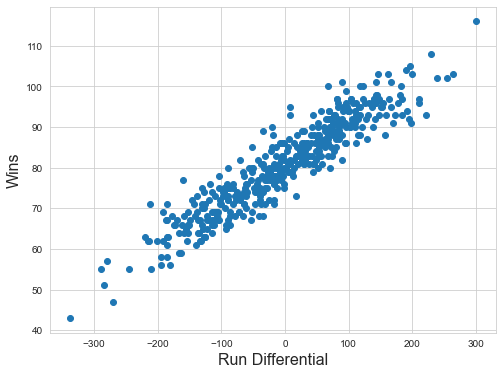

In [5]:
plt.figure(figsize=(8,6))

plt.scatter(ball_train.RD,
               ball_train.W)

plt.xlabel("Run Differential", fontsize=16)
plt.ylabel("Wins", fontsize=16)

plt.show()

There does appear to be a linear relationship.

##### 2. Comparing two models.

In the `Multiple Linear Regression` notebook we built this model:

$$
\texttt{W} = \beta_0 + \beta_1 \texttt{R} + \beta_2 \texttt{RD} + \epsilon.
$$

Does having `RD` broken down into its component parts make for "better" predictions?

Use a validation set to see if the above model has a lower validation MSE than this simple linear regression model:

$$
\texttt{W} = \beta_0 + \beta_1 \texttt{RD} + \epsilon.
$$

<i>Note: We are using a validation set here because it will be faster than cross-validation.</i>

##### Sample Solution

In [6]:
## Make a validation set
ball_tt, ball_val = train_test_split(ball_train.copy(),
                                        shuffle=True,
                                        random_state=332,
                                        test_size=.2) 

In [7]:
## Import things
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [8]:
## Make model objects
slr = LinearRegression(copy_X = True)

mlr = LinearRegression(copy_X = True)

## Fit the models on the tt set
slr.fit(ball_tt['RD'].values.reshape(-1,1),
           ball_tt['W'].values)

mlr.fit(ball_tt[['R', 'RA']].values,
           ball_tt['W'].values)

## Check the MSEs on the val set
print("Validation MSE of the SLR model is",
         mean_squared_error(ball_val.W, 
                            slr.predict(ball_val['RD'].values.reshape(-1,1))))

print("Validation MSE of the MLR model is",
         mean_squared_error(ball_val.W, 
                            mlr.predict(ball_val[['R', 'RA']].values)))

Validation MSE of the SLR model is 20.525586145824935
Validation MSE of the MLR model is 20.34348971361009


The validation set suggests that the more complex model,

$$
\texttt{W} = \beta_0 + \beta_1 \texttt{R} + \beta_2 \texttt{RA} + \epsilon,
$$

is marginally better than the simple linear regression model,

$$
\texttt{W} = \beta_0 + \beta_1 \texttt{RD} + \epsilon,
$$

but we may want to take the time to cross-validation to be more certain.

## Carseats

Now lets return to building predictive models to predict carseat `Sales`.

##### 3. Load and prepare the data

First load the `carseats.csv` data set and make a train test split of the data, set aside $20\%$ of the data for test set purposes.

##### Sample Solution

In [9]:
carseats = pd.read_csv("../Data/carseats.csv")

In [10]:
car_train, car_test = train_test_split(carseats.copy(),
                                          random_state = 30914230,
                                          shuffle = True,
                                          test_size = .2)

##### 4. More EDA

First load the scatter plots and correlation code chunks below to remind yourself of the EDA you accomplished in `Problem Set 2`.

In [11]:
import matplotlib.pyplot as plt
from seaborn import set_style, pairplot

set_style("whitegrid")

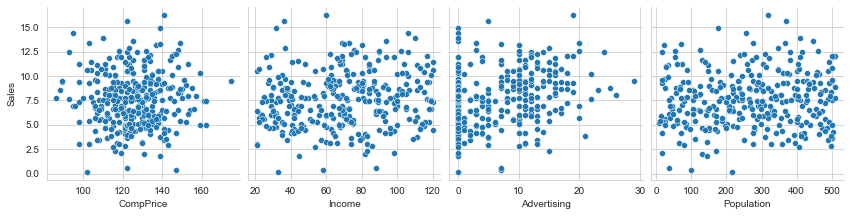

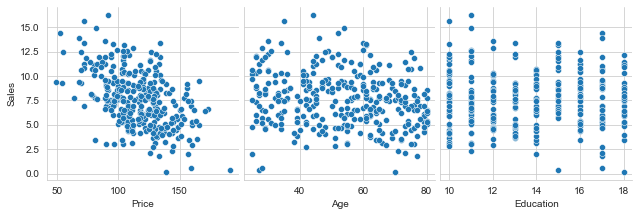

In [12]:
pairplot(car_train[['Sales', 'CompPrice', 'Income', 'Advertising', 'Population']],
            x_vars = ['CompPrice', 'Income', 'Advertising', 'Population'],
            y_vars = ['Sales'],
            height = 3)

plt.show()

print("\n\n\n\n")

pairplot(car_train[['Sales', 'Price', 'Age', 'Education']],
            y_vars = ['Sales'],
            x_vars = ['Price', 'Age', 'Education'],
            height = 3)

plt.show()

In [13]:
print("Correlation with Sales")
print("==================")
car_train[['Sales', 'CompPrice', 'Income', 'Advertising', 
                        'Population', 'Price', 'Age', 'Education']].corr()['Sales'].sort_values()

Correlation with Sales


Price         -0.481417
Age           -0.177564
Education     -0.020579
CompPrice      0.014234
Population     0.073049
Income         0.126370
Advertising    0.301981
Sales          1.000000
Name: Sales, dtype: float64

Now let's do some EDA for the variables we have not yet examined, `ShelveLoc`, `Urban` and `US`.

- Using `seaborn`'s `swarmplot`, <a href="https://seaborn.pydata.org/generated/seaborn.swarmplot.html">https://seaborn.pydata.org/generated/seaborn.swarmplot.html</a> visually explore if there appears to be different `Sales` for different values of `ShelveLoc`, `Urban`, and `US`.
- Using `pandas` `groupby`, <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html">https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html</a>, examine the medians, and means of `Sales` for different values of `ShelveLoc`, `Urban`, and `US`.

In [14]:
from seaborn import swarmplot

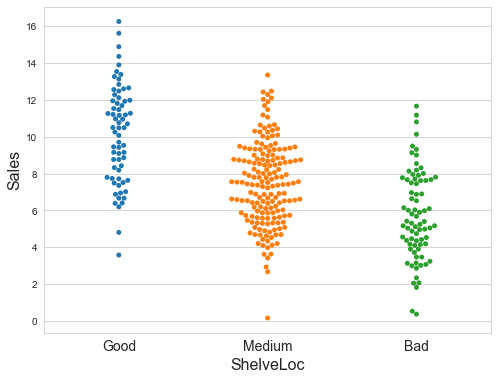

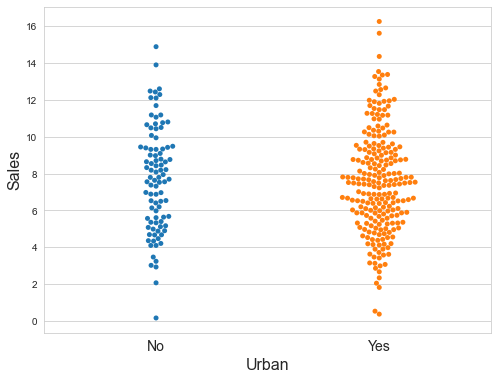

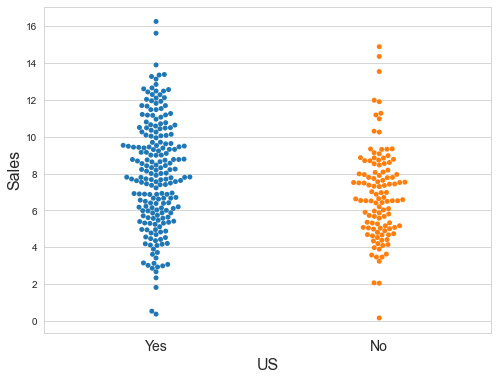

In [15]:
plt.figure(figsize=(8,6))

swarmplot(data = car_train,
             y = 'Sales',
             x = 'ShelveLoc')

plt.ylabel("Sales", fontsize=16)
plt.xlabel("ShelveLoc", fontsize=16)
plt.xticks(fontsize=14)
plt.show()

plt.figure(figsize=(8,6))

swarmplot(data = car_train,
             y = 'Sales',
             x = 'Urban')

plt.ylabel("Sales", fontsize=16)
plt.xlabel("Urban", fontsize=16)
plt.xticks(fontsize=14)
plt.show()

plt.figure(figsize=(8,6))

swarmplot(data = car_train,
             y = 'Sales',
             x = 'US')

plt.ylabel("Sales", fontsize=16)
plt.xlabel("US", fontsize=16)
plt.xticks(fontsize=14)
plt.show()

In [16]:
print("ShelveLoc")
print("+++++++++++++++++++++")
print("Mean")
print(car_train.groupby("ShelveLoc").Sales.mean())
print()
print("Median")
print(car_train.groupby("ShelveLoc").Sales.median())
print()
print()

print("Urban")
print("+++++++++++++++++++++")
print("Mean")
print(car_train.groupby("Urban").Sales.mean())
print()
print("Median")
print(car_train.groupby("Urban").Sales.median())
print()
print()

print("US")
print("+++++++++++++++++++++")
print("Mean")
print(car_train.groupby("US").Sales.mean())
print()
print("Median")
print(car_train.groupby("US").Sales.median())


ShelveLoc
+++++++++++++++++++++
Mean
ShelveLoc
Bad        5.733590
Good      10.173433
Medium     7.456457
Name: Sales, dtype: float64

Median
ShelveLoc
Bad        5.355
Good      10.500
Medium     7.440
Name: Sales, dtype: float64


Urban
+++++++++++++++++++++
Mean
Urban
No     7.707849
Yes    7.563392
Name: Sales, dtype: float64

Median
Urban
No     7.80
Yes    7.49
Name: Sales, dtype: float64


US
+++++++++++++++++++++
Mean
US
No     6.876870
Yes    8.014049
Name: Sales, dtype: float64

Median
US
No     6.64
Yes    8.01
Name: Sales, dtype: float64


##### 5. Choosing some models

Choose a few different linear regression models based on your explorations and write them down. If your models include categorical variables like `ShelveLoc`, `Urban`, or `US` make the one hot encoded variables below.

<i>If you are struggling to come up with some models here are some potential models you could try, note if you have models that you want to try feel free to ignore these suggestions :):</i>

$$
\text{Sales} = \beta_0 + \beta_1 \text{Price} + \epsilon
$$

$$
\text{Sales} = \beta_0 + \beta_1 \text{Price} + \beta_2 \text{Advertising} + \epsilon
$$

$$
\text{Sales} = \beta_0 + \beta_1 \text{Price} + \beta_2  \text{ShelveLoc_Bad} + \beta_3 \text{ShelveLoc_Good} + \epsilon
$$

$$
\text{Sales} = \beta_0 + \beta_1 \text{Price} + \beta_2 \text{Advertising} + \beta_3  \text{ShelveLoc_Bad} + \beta_4 \text{ShelveLoc_Good} + \epsilon
$$

$$
\text{Sales} = \beta_0 + \beta_1 \text{Price} + \beta_2 \text{Advertising} + \beta_3  \text{ShelveLoc_Bad} + \beta_4 \text{ShelveLoc_Good} + \beta_5 \text{Population} + \epsilon
$$

In [17]:
## Sample Solution
# ShelveLoc
car_train[['ShelveGood', 'ShelveBad']] = pd.get_dummies(car_train['ShelveLoc'])[['Good', 'Bad']]
car_test[['ShelveGood', 'ShelveBad']] = pd.get_dummies(car_test['ShelveLoc'])[['Good', 'Bad']]

car_train['US'] = pd.get_dummies(car_train['US'])['Yes']
car_test['US'] = pd.get_dummies(car_test['US'])['Yes']

car_train['Urban'] = pd.get_dummies(car_train['Urban'])['Yes']
car_test['Urban'] = pd.get_dummies(car_test['Urban'])['Yes']

##### 6. Model Comparison

Compare the models you chose using cross-validation to find the one we think will have the lowest MSE. Remember to include a baseline model for comparison purposes.

##### Sample Solution

In [18]:
## import kfold
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [19]:
## inputs 
inputs = ['baseline', 
          ['Price'], 
          ['Price','Advertising'], 
          ['Price','ShelveBad','ShelveGood'],
          ['Price','Advertising','ShelveBad','ShelveGood'],
          ['Price','Advertising','ShelveBad','ShelveGood', 'Population']]

## perform cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=440)

## make empty set for cv
cv_mses = np.zeros((5, len(inputs)))


## i keeps track of what cv split we are on
i = 0
for train_index, test_index in kfold.split(car_train):
    ## j keep track of what model we are on
    j = 0
    for features in inputs:
        ## get the training sets and the holdout set
        car_tt = car_train.iloc[train_index]
        car_ho = car_train.iloc[test_index]
        
        ## fit the model and get the predictions
        if features == "baseline":
            pred = car_tt.Sales.mean()*np.ones(len(car_ho))
        elif len(features) == 1:
            reg = LinearRegression(copy_X=True)
            reg.fit(car_tt[features].values.reshape(-1,1), car_tt['Sales'].values)
            pred = reg.predict(car_ho[features].values.reshape(-1,1))
        else:
            reg = LinearRegression(copy_X=True)
            reg.fit(car_tt[features].values, car_tt['Sales'].values)
            pred = reg.predict(car_ho[features].values)
            
        ## record the mse for this model and split
        cv_mses[i,j] = mean_squared_error(car_ho.Sales.values, pred)
        j = j + 1
    i = i + 1

In [20]:
for i in range(len(inputs)):
    if inputs[i] == "baseline":
        print("The avg cv mse for the baseline model is",
                 np.round(np.mean(cv_mses[:,i]),4))
    else:
        print("The avg cv mse for the model using",
                 inputs[i], 
                 "as the inputs is",
                 np.round(np.mean(cv_mses[:,i]),4))

The avg cv mse for the baseline model is 7.8573
The avg cv mse for the model using ['Price'] as the inputs is 6.1049
The avg cv mse for the model using ['Price', 'Advertising'] as the inputs is 5.3278
The avg cv mse for the model using ['Price', 'ShelveBad', 'ShelveGood'] as the inputs is 3.6225
The avg cv mse for the model using ['Price', 'Advertising', 'ShelveBad', 'ShelveGood'] as the inputs is 2.9716
The avg cv mse for the model using ['Price', 'Advertising', 'ShelveBad', 'ShelveGood', 'Population'] as the inputs is 2.9715


Of these models we find two with almost identical average CV MSEs:

$$
\text{Sales} = \beta_0 + \beta_1 \text{Price} + \beta_2 \text{Advertising} + \beta_3  \text{ShelveLoc_Bad} + \beta_4 \text{ShelveLoc_Good} + \epsilon,
$$

$$
\text{Sales} = \beta_0 + \beta_1 \text{Price} + \beta_2 \text{Advertising} + \beta_3  \text{ShelveLoc_Bad} + \beta_4 \text{ShelveLoc_Good} + \beta_5 \text{Population} + \epsilon,
$$

Note that your answer could be different if you tested different models or had a different train test split.

--------------------------

This notebook was written for the Erd&#337;s Institute C&#337;de Data Science Boot Camp by Matthew Osborne, Ph. D., 2022.

Any potential redistributors must seek and receive permission from Matthew Tyler Osborne, Ph.D. prior to redistribution. Redistribution of the material contained in this repository is conditional on acknowledgement of Matthew Tyler Osborne, Ph.D.'s original authorship and sponsorship of the Erdős Institute as subject to the license (see License.md)